## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [111]:
import numpy as np 
import matplotlib.pyplot as plt


To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [112]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [113]:
X = X.reshape((50,1))
X.shape

(50, 1)

In [114]:
a=-2
b=1
y=a*X+b
y

array([[  1.        ],
       [  0.18367347],
       [ -0.63265306],
       [ -1.44897959],
       [ -2.26530612],
       [ -3.08163265],
       [ -3.89795918],
       [ -4.71428571],
       [ -5.53061224],
       [ -6.34693878],
       [ -7.16326531],
       [ -7.97959184],
       [ -8.79591837],
       [ -9.6122449 ],
       [-10.42857143],
       [-11.24489796],
       [-12.06122449],
       [-12.87755102],
       [-13.69387755],
       [-14.51020408],
       [-15.32653061],
       [-16.14285714],
       [-16.95918367],
       [-17.7755102 ],
       [-18.59183673],
       [-19.40816327],
       [-20.2244898 ],
       [-21.04081633],
       [-21.85714286],
       [-22.67346939],
       [-23.48979592],
       [-24.30612245],
       [-25.12244898],
       [-25.93877551],
       [-26.75510204],
       [-27.57142857],
       [-28.3877551 ],
       [-29.20408163],
       [-30.02040816],
       [-30.83673469],
       [-31.65306122],
       [-32.46938776],
       [-33.28571429],
       [-34

### Plot X vs. y

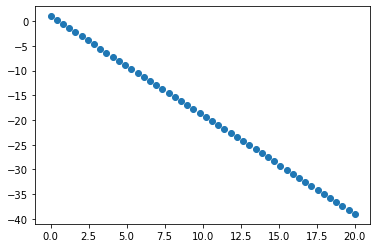

In [115]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [139]:
def predict(theta0,theta1,X):
    h=theta0+theta1*X
    return h
def calc_error(h , y):
    m = len(y)
    error = (h - y)
    j = (error.T@error) /(2*m)
    return (error , j)

def calc_error_stodcats(h , y):
    error = (h - y)
    j = (error.T@error) /(2)
    return (error , j)

def calc_d_theta(h , y ,X , m):
    d_theta0 =np.sum(h - y) /m
    d_theta1 = np.sum((h-y)*X) / m
    g_vec =np.array([[d_theta0 ] , [d_theta1]])
    return(d_theta0 , d_theta1, g_vec)

def updatae_theta(theta0 ,d_theta0 , theta1,d_theta1 , a ):
    theta_0_new = theta0 - a*d_theta0
    theta_1_new = theta1 - a*d_theta1
    return (theta_0_new,theta_1_new )
    

In [117]:
def GD_func(X , y , a ,iterations):
    theta_0_new1 = 0 
    theta_1_new1=0
    m =len(X)
    costs_hestory=[]
    thetas0 =[]
    thetas1 =[]
    hs = []
    counter = 1
    thetas0.append(theta_0_new1)
    thetas1.append(theta_1_new1)
    for i in range(iterations):

        print(f' #################   In the iteration {i} #############################################################')
        h = predict( theta_0_new1 ,theta_1_new1 , X )
        
        error1 , j1 = calc_error(h , y)
        costs_hestory.append(j1[0])
        if i !=0:
            
            if abs(costs_hestory[i] -costs_hestory[i-1]) <0.001:
                break
        print('Error Vec  \n'+str(error1)+'\n')
        print('j = '+str(j1[0][0]))
        print()
        d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=m , X=X ,y=y)
        grad_norm = np.linalg.norm(e_vec)
        print('d_theta0 : '+str(d_theta01))
        print('d_theta1 : '+str(d_theta11))
        print('the gradient vec is' +str(e_vec))
        print('the gradient vec norm is' +str(grad_norm))
        if grad_norm<0.001:
            break
        
            
        theta_0_new1 , theta_1_new1 = updatae_theta(theta_0_new1 ,d_theta01, theta_1_new1,d_theta11, a )
        thetas0.append(theta_0_new1)
        thetas1.append(theta_1_new1)
        hs.append(h)

        print('theta_0_new : '+str(theta_0_new1))
        print('theta_1_new : '+str(theta_1_new1))
    print('#################################################################################')
    print('theta0 optemal '+str(theta_0_new1))
    print('theta1 optemal '+str(theta_0_new1))
    
    return (theta_0_new1 , theta_1_new1 , costs_hestory , thetas0 , thetas1 , hs)
    
    
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = GD_func(X,y ,0.0005 , 300 )
h = predict(theta0 , theta1 ,X)

print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
Error Vec  
[[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.46938776]
 [33.28571429]
 [34.10204082]
 [34.91836735]
 [35.73469388]
 [36.55102041]
 [37.36734694]
 [38.18367347]
 [39.        ]]

j = 249.88775510204084

d_theta0 : 19.0
d_theta1 : 259.38775510204084
the gradient vec is[[ 19.       ]
 [259.3877551]]
the gradient v

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

#### Calculate r2 score

In [118]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

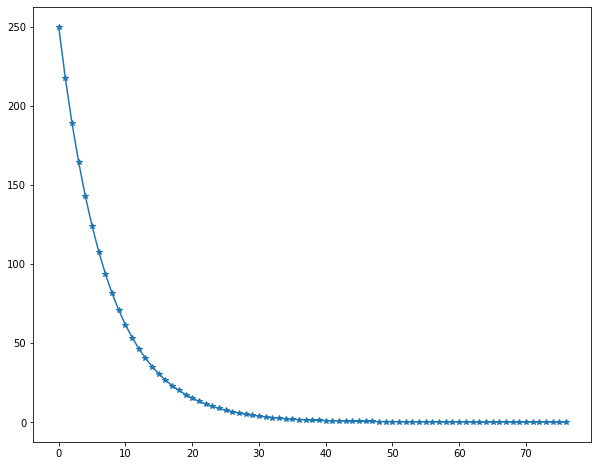

In [119]:
plt.figure(figsize = (10,8))
plt.plot(costs_hestory, marker = '*')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

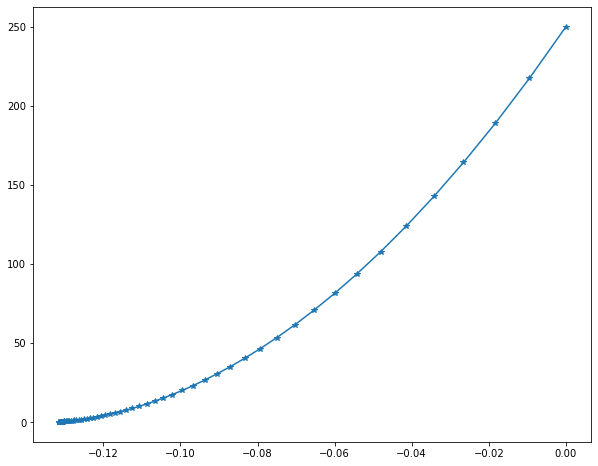

In [120]:
plt.figure(figsize=(10,8))
plt.plot(thetas0,costs_hestory, marker = '*')
plt.show()

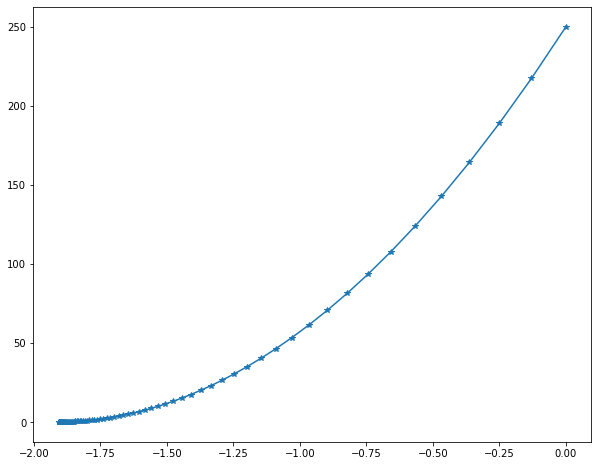

In [121]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory, marker = '*')


#### Plot all regression lines till converge

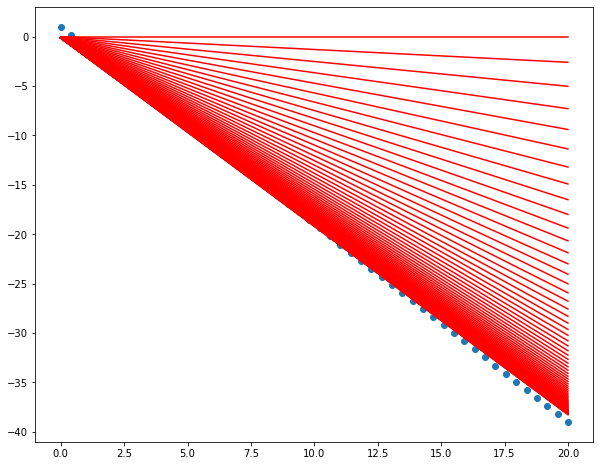

In [122]:
plt.figure(figsize=(10,8))
plt.scatter(X, y )
for i in hs:
    plt.plot(X, i ,color = 'r')
plt.show()

#### Plot the best regression line

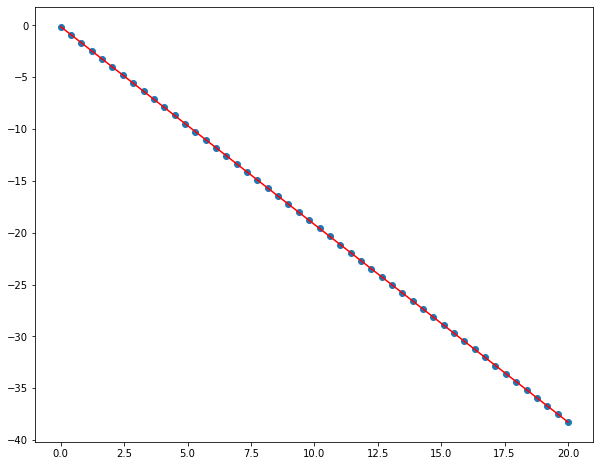

In [124]:
plt.figure(figsize=(10,8))
plt.scatter(X,h )
plt.plot(X,h , color = 'r')
plt.show()

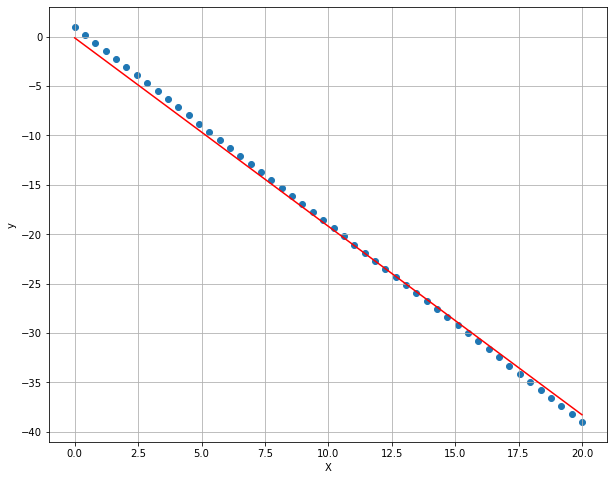

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [125]:
theta01, theta11 , costs_hestory1 , thetas01 , thetas11 , hs1 = GD_func(X,y ,0.00005 , 1000 )
h1 = predict(theta01 , theta11 ,X)


 #################   In the iteration 0 #############################################################
Error Vec  
[[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.46938776]
 [33.28571429]
 [34.10204082]
 [34.91836735]
 [35.73469388]
 [36.55102041]
 [37.36734694]
 [38.18367347]
 [39.        ]]

j = 249.88775510204084

d_theta0 : 19.0
d_theta1 : 259.38775510204084
the gradient vec is[[ 19.       ]
 [259.3877551]]
the gradient v

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693

r2_score: 0.9965793400861428


In [126]:
from sklearn.metrics import r2_score
r2_score(y,h1)

0.9965793400861428

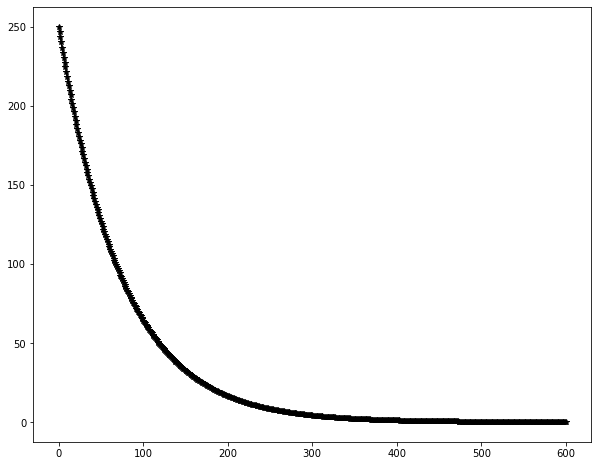

In [127]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory1, marker = '*' , color = 'black')

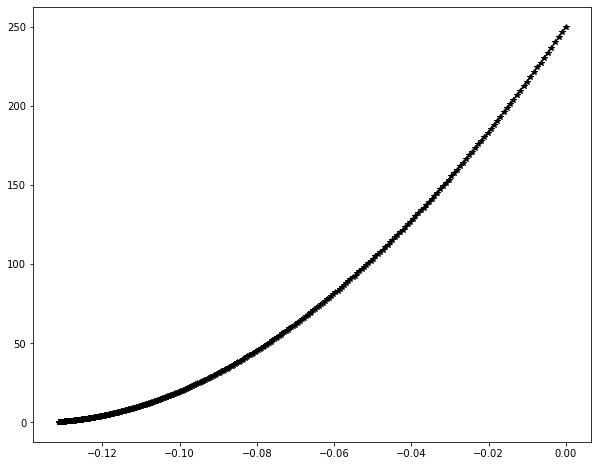

In [128]:
plt.figure(figsize=(10,8))
plt.plot(thetas01 , costs_hestory1, marker = '*' , color = 'black')

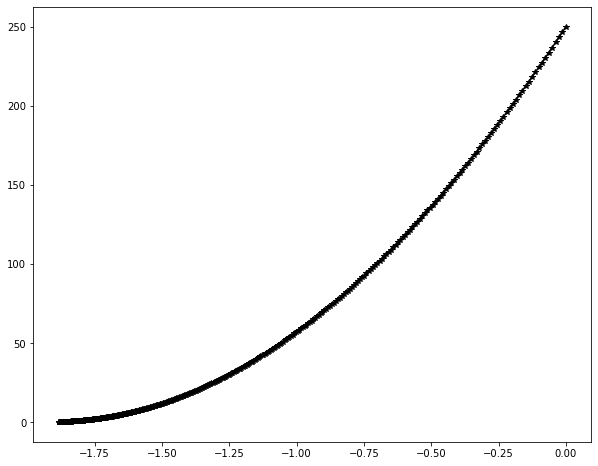

In [129]:
plt.figure(figsize=(10,8))
plt.plot(thetas11 , costs_hestory1, marker = '*' , color = 'black')

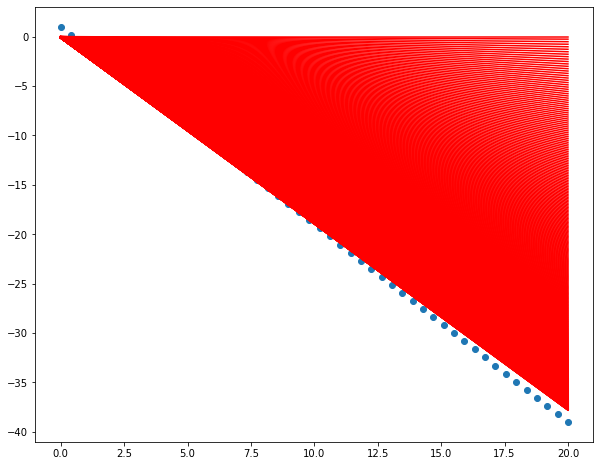

In [130]:
plt.figure(figsize=(10, 8 ))
plt.scatter(X , y)

for i in hs1:
    plt.plot( X , i , color = 'r')

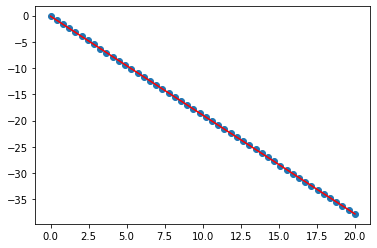

In [131]:
plt.scatter(X,h1 )
plt.plot(X,h1 , color = 'r')
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [132]:
theta02, theta12 , costs_hestory2 , thetas02 , thetas12 , hs2 = GD_func(X,y ,0.005 , 300 )
h2 = predict(theta02, theta12 ,X)


 #################   In the iteration 0 #############################################################
Error Vec  
[[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.46938776]
 [33.28571429]
 [34.10204082]
 [34.91836735]
 [35.73469388]
 [36.55102041]
 [37.36734694]
 [38.18367347]
 [39.        ]]

j = 249.88775510204084

d_theta0 : 19.0
d_theta1 : 259.38775510204084
the gradient vec is[[ 19.       ]
 [259.3877551]]
the gradient v

In [133]:
from sklearn.metrics import r2_score
r2_score(y,h2)

0.9976200723230484

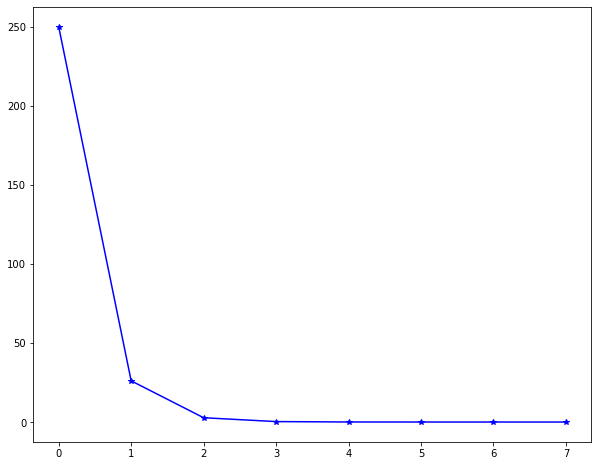

In [134]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory2, marker = '*' , c='b' )

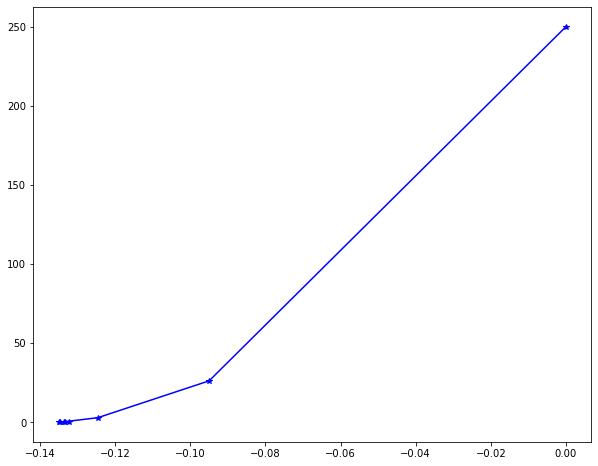

In [135]:
plt.figure(figsize=(10,8))
plt.plot(thetas02,costs_hestory2, marker = '*' , c='b' )

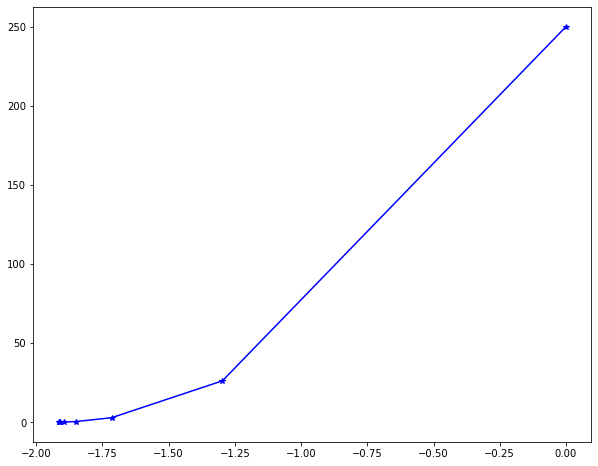

In [136]:
plt.figure(figsize=(10,8))
plt.plot(thetas12,costs_hestory2, marker = '*' , c='b' )

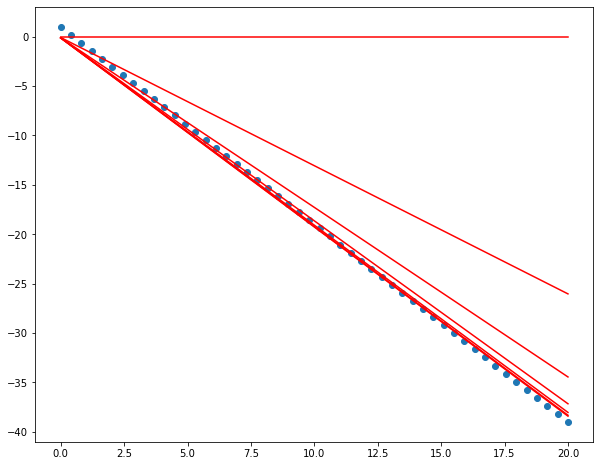

In [137]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for  i in hs2:
    plt.plot(X ,i , color = 'r')

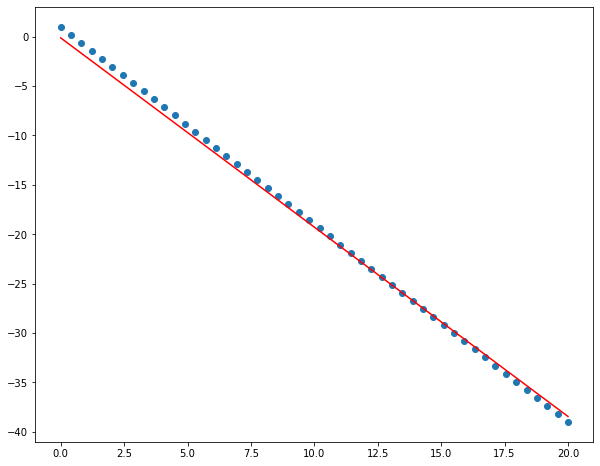

In [138]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X , h2 , color ='r')

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [97]:
from sklearn.utils import shuffle


In [206]:

def StochasticGD_func(X , y , a ,iterations):
    X , y = shuffle(X, y ,random_state=0 )
    theta_0_new1 = 0 
    theta_1_new1 = 0 
    costs =[]
    thetas0=[]
    thetas1=[]
    costs_per_epoc = []
    grad_norm1 = 0 
    theta0_per_epoc = []
    theta1_per_epoc= []
    hs=[]
    
    for i in range(iterations):
        print(f'##################### Epoch {i} #######################################')
        for j in range(len(X)):
            # make prediction 
            h = predict(theta_0_new1 , theta_1_new1 , X[j])
            # find the error function 
            err , j1 = calc_error_stodcats(h , y[j])    
            d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=1 , X=X[j] ,y=y[j])
            grad_norm = np.linalg.norm(e_vec)
            theta_0_new1 , theta_1_new1 = updatae_theta(theta_0_new1 ,d_theta01, theta_1_new1,d_theta11, a )
            thetas0.append(theta_0_new1)
            thetas1.append(theta_1_new1)
            costs.append(j1)
            hs.append(h)
            if j ==0:
                costs_per_epoc.append(j1)
            if j ==len(X)-1 :
                costs_per_epoc.append(j1)
                theta0_per_epoc.append(theta_0_new1)
                theta1_per_epoc.append(theta_1_new1)
                grad_norm1 = grad_norm
        
        print(f'theta 0 new is {theta0_per_epoc[i]}')
        print(f'theta 1 new is {theta1_per_epoc[i]}')
        print(f'gradient vector norm {grad_norm1}')
        print()
        print(f'cost per epoc is {costs_per_epoc[i]}')
        print(theta_0_new1)
        print(theta_1_new1)
        
        if i!=0:
            if abs( costs_per_epoc[i] - costs_per_epoc[i-1])<0.1:
                break
        
        if grad_norm1 <0.01 :
            break
    return (theta_0_new1 , theta_1_new1 , costs , theta0_per_epoc , theta1_per_epoc , hs , thetas0 , thetas1)
    
    
theta_0_new123, theta_1_new123 , costs_hestory , thetas0_per , thetas1_per  , hs,thetas0 , thetas1  = StochasticGD_func(X,y ,0.0005 , 300 )
           

##################### Epoch 0 #######################################
theta 0 new is -0.1383875026464359
theta 1 new is -1.87120533914806
gradient vector norm 25.206096291951095

cost per epoc is 238.8673469387755
-0.1383875026464359
-1.87120533914806
##################### Epoch 1 #######################################
theta 0 new is -0.13493495293378563
theta 1 new is -1.9219697967975178
gradient vector norm 5.716979348256036

cost per epoc is 0.9818916581982673
-0.13493495293378563
-1.9219697967975178
##################### Epoch 2 #######################################
theta 0 new is -0.12771735405002738
theta 1 new is -1.9238149576730008
gradient vector norm 5.160782735351623

cost per epoc is 0.05562829441096989
-0.12771735405002738
-1.9238149576730008
##################### Epoch 3 #######################################
theta 0 new is -0.12044455310162668
theta 1 new is -1.9243425283134186
gradient vector norm 5.113533094343857

cost per epoc is 0.05051096145408851
-0.1204445531

In [207]:
h3 = predict(theta_0_new123 , theta_1_new123 , X)


In [208]:
from sklearn.metrics import r2_score
r2_score(y,h3)

0.9976149188579704

##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 0.37828093829974396

Gradient Vector:
[[-0.86980565]
 [-1.77511358]]

Gradient Vector Norm:
1.9767625301666

theta_0_new : -0.13516909716690004
theta_1_new : -1.869971913093026

****************** Epoch 1 ********************

Cost = 0.4705021363396433

Gradient Vector:
[[-0.97005375]
 [-1.97970153]]

Gradient Vector Norm:
2.2045912095645743

theta_0_new : -0.13169704743062774
theta_1_new : -1.9207947829431942

****************** Epoch 2 ********************

Cost = 0.4672003879494755

Gradient Vector:
[[-0.96664408]
 [-1.97274302]]

Gradient Vector Norm:
2.196842232437341

theta_0_new : -0.12450421548406185
theta_1_new : -1.9226485332326042

****************** Epoch 3 ********************

Cost = 0.4612690180123547

Gradient Vector:
[[-0.96048844]
 [-1.96018048]]

Gradient Vector Norm:
2.1828526193936026

theta_0_new : -0.11725717626212058
theta_1_new : -1.923183317357008

****************** Epoch 4 ********************

Cost = 0

r2_score: 0.9976768960178554


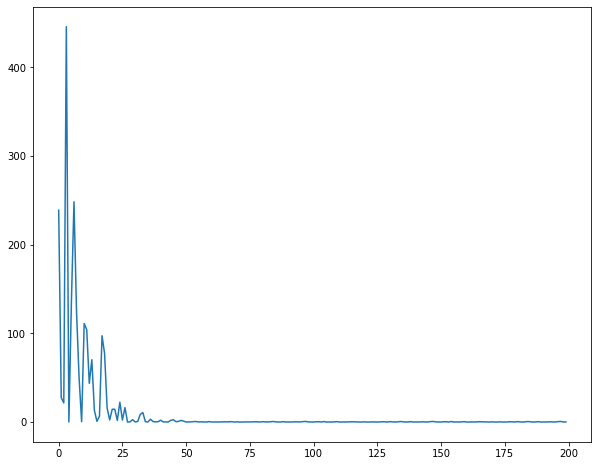

In [209]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory)

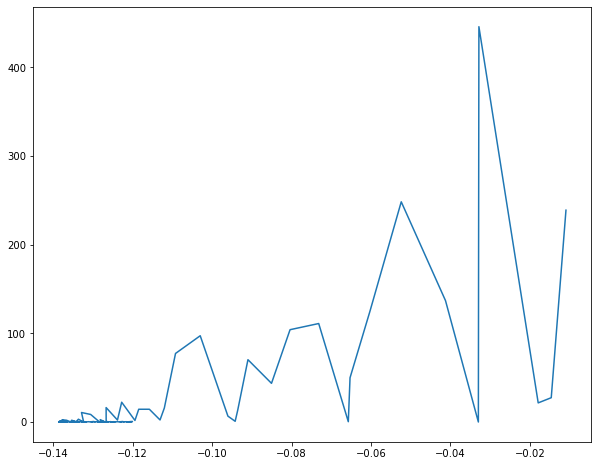

In [210]:
plt.figure(figsize=(10,8))
plt.plot(thetas0 , costs_hestory)

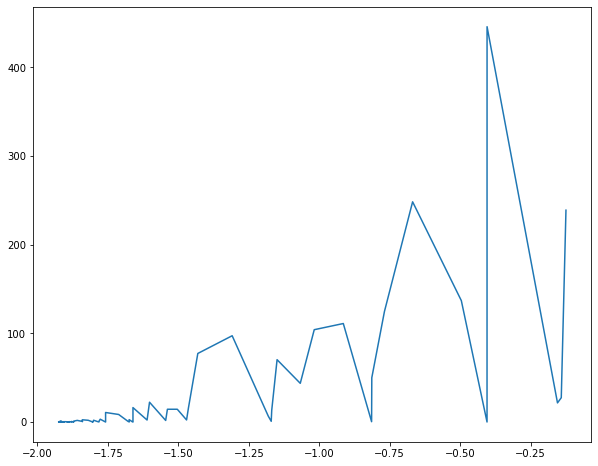

In [211]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory)

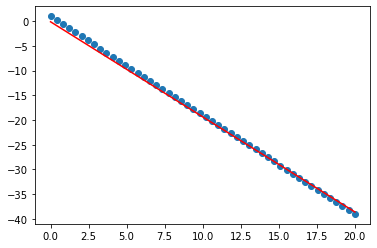

In [212]:
plt.scatter(X,y )
plt.plot(X,h3 , color = 'r')
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [189]:
theta_0_new123, theta_1_new123 , costs_hestory , thetas0 , thetas1 , hs = StochasticGD_func(X,y ,0.0001 , 300 )
h4 = predict(theta_0_new123 , theta_1_new123 , X)


##################### Epoch 0 #######################################
theta 0 new is -0.07008610381719522
theta 1 new is -0.9510714534111494
gradient vector norm 330.27519895768876

cost per epoc is 238.8673469387755
-0.07008610381719522
-0.9510714534111494
##################### Epoch 1 #######################################
theta 0 new is -0.10466560229056263
theta 1 new is -1.4302321232759807
gradient vector norm 169.67304183218138

cost per epoc is 168.57932637750503
-0.10466560229056263
-1.4302321232759807
##################### Epoch 2 #######################################
theta 0 new is -0.12135938404879158
theta 1 new is -1.6716650504761148
gradient vector norm 88.76458593709238

cost per epoc is 59.5977450780512
-0.12135938404879158
-1.6716650504761148
##################### Epoch 3 #######################################
theta 0 new is -0.1290440682682457
theta 1 new is -1.7933412407365563
gradient vector norm 48.0022794493555

cost per epoc is 44.49160572664619
-0.1290440682

In [159]:
from sklearn.metrics import r2_score
r2_score(y,h3)

0.9976149188579704

r2_score =  0.9976210193556192


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(thetas12,costs_hestory2, marker = '*' , c='b' )

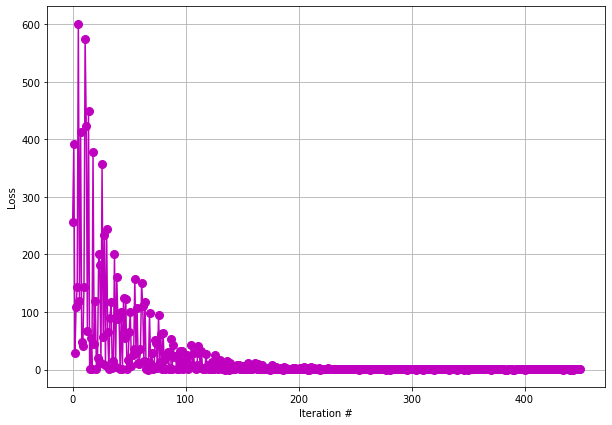

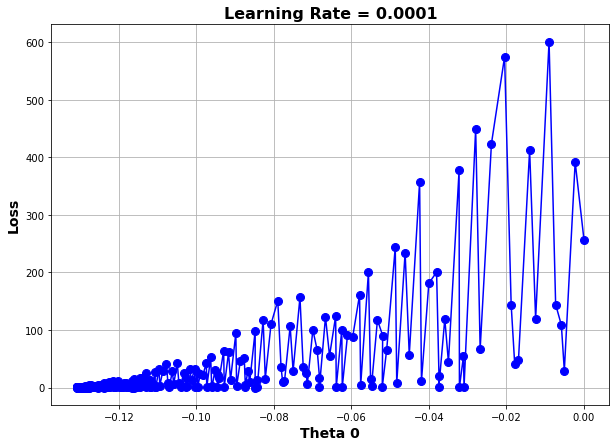

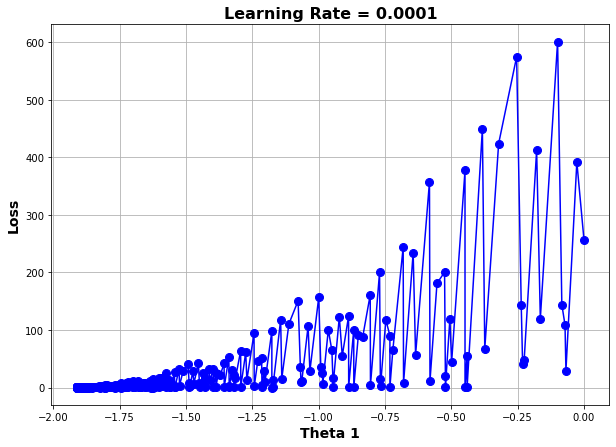

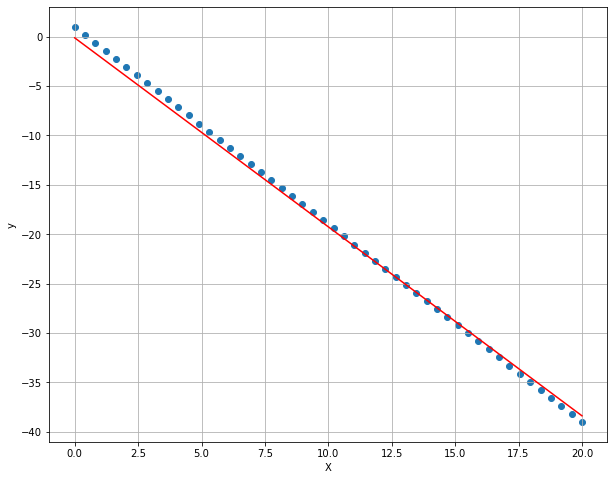

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [214]:
theta_0_new123, theta_1_new123 , costs_hestory , thetas0_per , thetas1_per , hs,thetas0,thetas1 = StochasticGD_func(X,y ,0.00007 , 300 )
h4 = predict(theta_0_new123 , theta_1_new123 , X)


##################### Epoch 0 #######################################
theta 0 new is -0.05358276465473902
theta 1 new is -0.7282719827523381
gradient vector norm 400.93805843483057

cost per epoc is 238.8673469387755
-0.05358276465473902
-0.7282719827523381
##################### Epoch 1 #######################################
theta 0 new is -0.08641060538791454
theta 1 new is -1.1797730588662836
gradient vector norm 251.1050299677086

cost per epoc is 248.4316674478285
-0.08641060538791454
-1.1797730588662836
##################### Epoch 2 #######################################
theta 0 new is -0.10637234382394123
theta 1 new is -1.4596974966017082
gradient vector norm 158.2178167673057

cost per epoc is 90.86128926303289
-0.10637234382394123
-1.4596974966017082
##################### Epoch 3 #######################################
theta 0 new is -0.1183584405315803
theta 1 new is -1.6332576278723117
gradient vector norm 100.63261842924805

cost per epoc is 97.44581966055415
-0.118358440

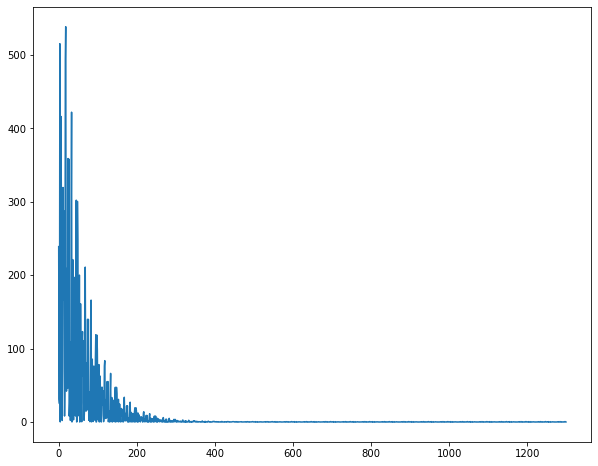

In [215]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory)

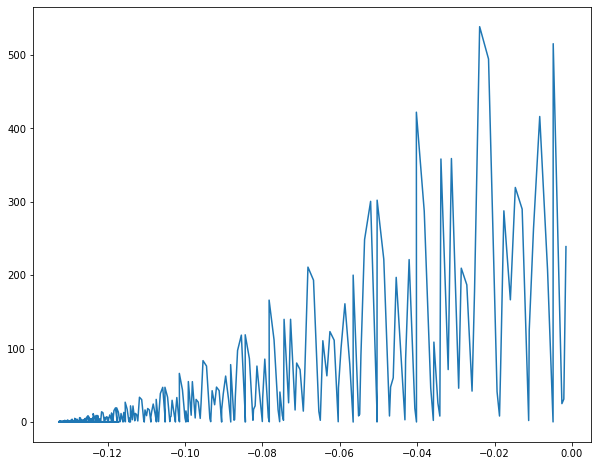

In [216]:
plt.figure(figsize=(10,8))
plt.plot(thetas0 , costs_hestory)

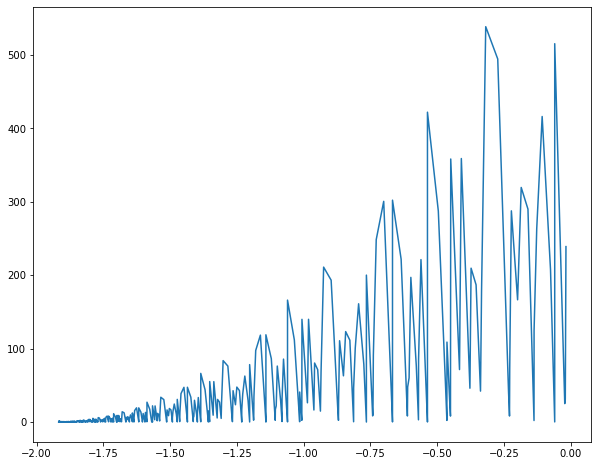

In [217]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory)

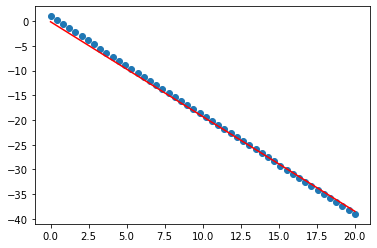

In [219]:
plt.scatter(X,y )
plt.plot(X,h4 , color = 'r')
plt.show()

r2_score =  0.997655146572521


In [192]:
r2_score(y,h4)

0.997682428986251

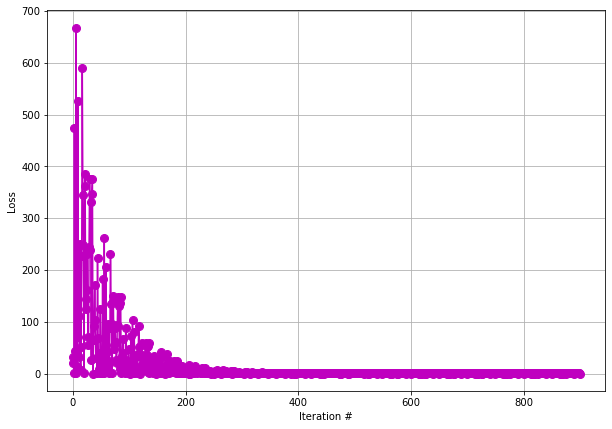

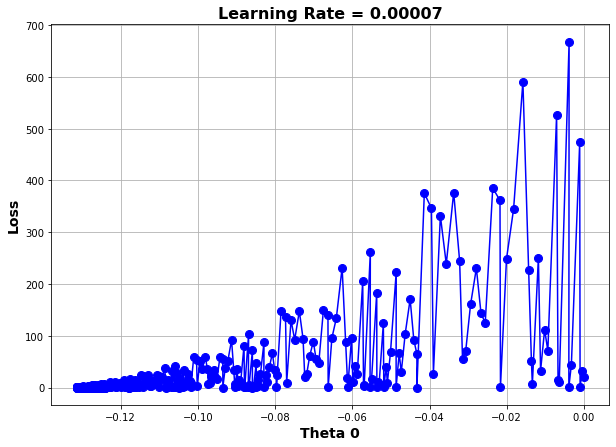

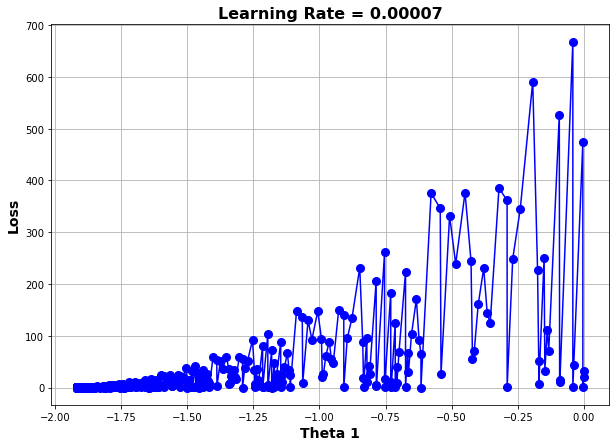

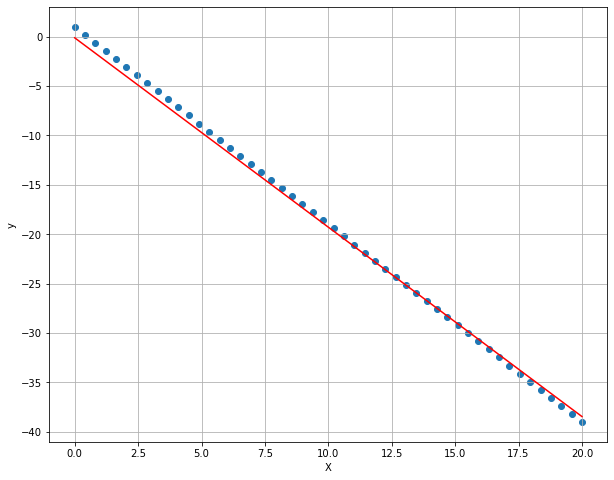

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [268]:
def mini_batch(X,y ,b , a ,iterations):
    X , y = shuffle(X, y ,random_state=0 )
    theta_0_new1 = 0 
    theta_1_new1 = 0 
    costs =[]
    thetas0=[]
    thetas1=[]
    costs_per_epoc = []
    grad_norm1 = 0 
    theta0_per_epoc = []
    theta1_per_epoc= []
    hs=[]
    
    for i in range(iterations):
        print(f'##################### Epoch {i} #######################################')
        for j in range(0,m, b):
            # make prediction 
            h = predict(theta_0_new1 , theta_1_new1 , X[j])
            # find the error function 
            err , j1 = calc_error_stodcats(h , y[j])    
            d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=1 , X=X[j] ,y=y[j])
            grad_norm = np.linalg.norm(e_vec)
            theta_0_new1 , theta_1_new1 = updatae_theta(theta_0_new1 ,d_theta01, theta_1_new1,d_theta11, a )
            thetas0.append(theta_0_new1)
            thetas1.append(theta_1_new1)
            costs.append(j1)
            hs.append(h)
            if j ==0:
                costs_per_epoc.append(j1)
            if j ==b-1 :
                costs_per_epoc.append(j1)
                theta0_per_epoc.append(theta_0_new1)
                theta1_per_epoc.append(theta_1_new1)
                grad_norm1 = grad_norm
        
        print(f'theta 0 new is {theta0_per_epoc[i]}')
        print(f'theta 1 new is {theta1_per_epoc[i]}')
        print(f'gradient vector norm {grad_norm1}')
        print()
        print(f'cost per epoc is {costs_per_epoc[i]}')
        print(theta_0_new1)
        print(theta_1_new1)
        
        if i!=0:
            if abs( costs_per_epoc[i] - costs_per_epoc[i-1])<0.1:
                break
        
        if grad_norm1 <0.01 :
            break
    return (theta_0_new1 , theta_1_new1 , costs , theta0_per_epoc , theta1_per_epoc , hs , thetas0 , thetas1)
    

In [309]:
def mini_batch(X,y ,b , a ,iterations):
    X , y = shuffle(X, y ,random_state=0 )
    theta_0_new1 = 0 
    theta_1_new1 = 0 
    costs =[]
    thetas0=[]
    thetas1=[]
    costs_per_epoc = []
    grad_norm1 = 0 
    theta0_per_epoc = []
    theta1_per_epoc= []
    hs=[]
    grad_norm1 = []
    
    for i in range(iterations):
        print(f'##################### Epoch {i} #######################################')
        for j in range(b):
            # make prediction 
            h = predict(theta_0_new1 , theta_1_new1 , X[j*b:(j+1)*b])
            # find the error function 
            err , j1 = calc_error_stodcats(h , y[j*b:(j+1)*b])    
            costs.append(j1[0][0])
            d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=b , X=X[j*b:(j+1)*b] ,y=y[j*b:(j+1)*b])
            grad_norm = np.linalg.norm(e_vec)
            theta_0_new1 , theta_1_new1 = updatae_theta(theta_0_new1 ,d_theta01, theta_1_new1,d_theta11, a )
            thetas0.append(theta_0_new1)
            thetas1.append(theta_1_new1)
            hs.append(h)
            grad_norm1.append(grad_norm)
            if j ==0:
                costs_per_epoc.append(j1)
            if j ==b-1 :
                costs_per_epoc.append(j1)
                theta0_per_epoc.append(theta_0_new1)
                theta1_per_epoc.append(theta_1_new1)
                
        
        print(f'theta 0 new is {theta0_per_epoc[i]}')
        print(f'theta 1 new is {theta1_per_epoc[i]}')
        print(f'gradient vector norm {np.linalg.norm(grad_norm1)}')
        print()
        print(f'cost per epoc is {costs_per_epoc[i]}')
        print(theta_0_new1)
        print(theta_1_new1)
        
        if i!=0:
            if abs( costs_per_epoc[i] - costs_per_epoc[i-1])<0.3:
                break
        
        if np.linalg.norm(grad_norm1) <0.3 :
            break
    return (theta_0_new1 , theta_1_new1 , costs , theta0_per_epoc , theta1_per_epoc , hs , thetas0 , thetas1)
theta0, theta1 , costs_hestory , thetas0_per , thetas1_per , hs,thetas0,thetas1 = mini_batch(X,y,5 ,0.0005 , 300 )
h = predict(theta0 , theta1 ,X)

##################### Epoch 0 #######################################
theta 0 new is -0.04345204359229028
theta 1 new is -0.5706461314040114
gradient vector norm 520.2451714037821

cost per epoc is [[823.69117035]]
-0.04345204359229028
-0.5706461314040114
##################### Epoch 1 #######################################
theta 0 new is -0.07376774651811102
theta 1 new is -0.9710343328484687
gradient vector norm 635.5929156194628

cost per epoc is [[728.21352024]]
-0.07376774651811102
-0.9710343328484687
##################### Epoch 2 #######################################
theta 0 new is -0.09486685254954526
theta 1 new is -1.2519666372568352
gradient vector norm 685.3266588078224

cost per epoc is [[404.50956968]]
-0.09486685254954526
-1.2519666372568352
##################### Epoch 3 #######################################
theta 0 new is -0.10949952125714717
theta 1 new is -1.449086624250247
gradient vector norm 708.5603011324318

cost per epoc is [[357.90880428]]
-0.109499521257147

In [310]:
r2_score(y,h)

0.9975945061907149

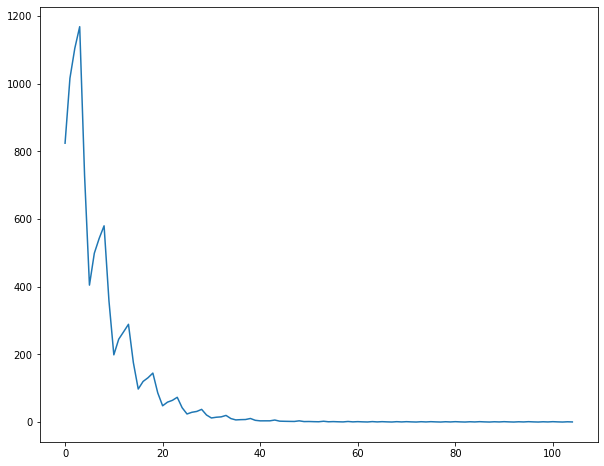

In [311]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory)

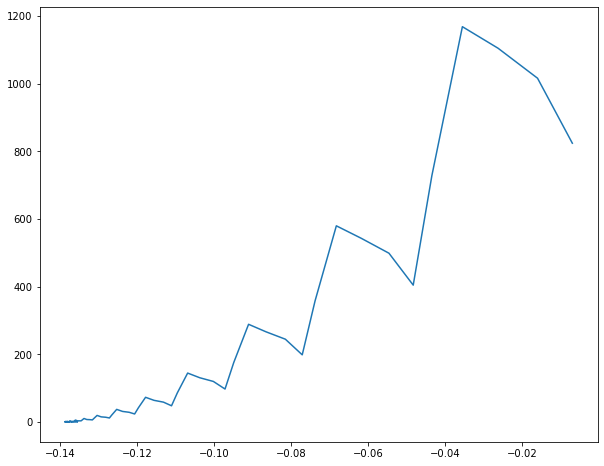

In [312]:
plt.figure(figsize=(10,8))
plt.plot(thetas0 , costs_hestory)

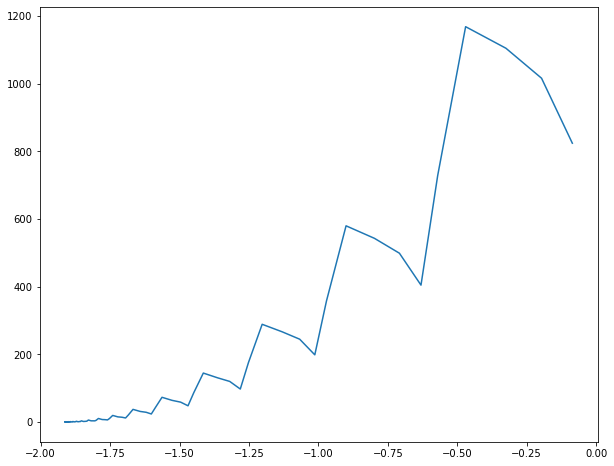

In [313]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory)

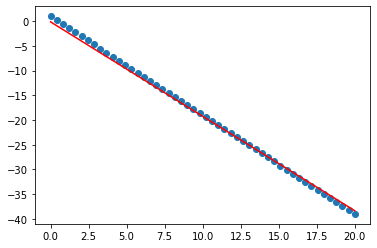

In [314]:
plt.scatter(X,y )
plt.plot(X,h , color = 'r')
plt.show()

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

r2_score 0.9974493632266231


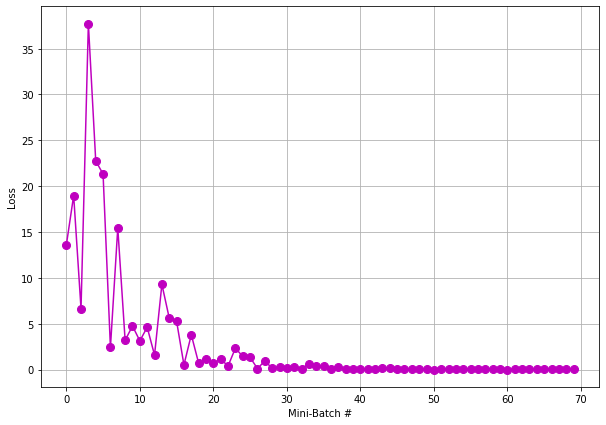

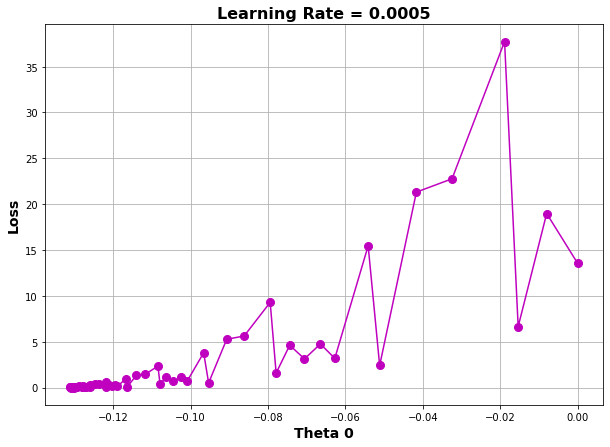

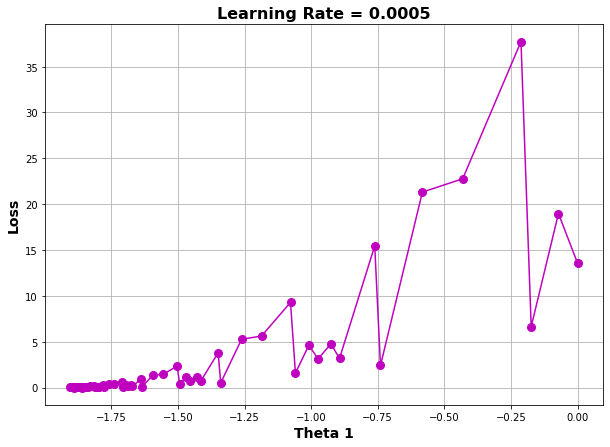

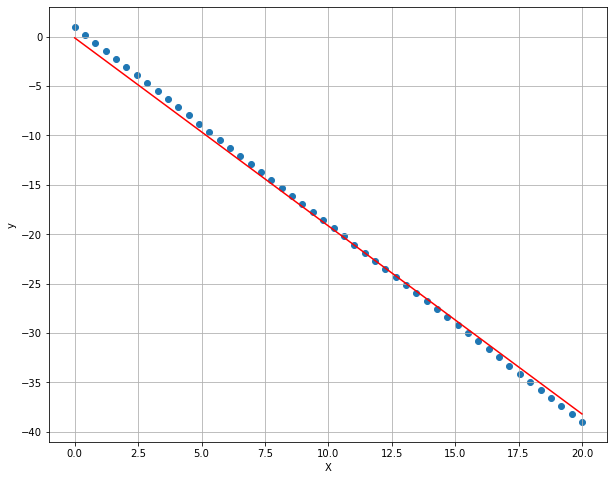

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [315]:
theta0, theta1 , costs_hestory , thetas0_per , thetas1_per , hs,thetas0,thetas1 = mini_batch(X,y,10,0.0005 , 300 )
h = predict(theta0 , theta1 ,X)

##################### Epoch 0 #######################################
theta 0 new is -0.04168031819112537
theta 1 new is -0.5671867388074792
gradient vector norm 517.5967802924325

cost per epoc is [[1937.42815494]]
-0.04168031819112537
-0.5671867388074792
##################### Epoch 1 #######################################
theta 0 new is -0.07080387580223362
theta 1 new is -0.96646198195245
gradient vector norm 633.0209240008561

cost per epoc is [[0.]]
-0.07080387580223362
-0.96646198195245
##################### Epoch 2 #######################################
theta 0 new is -0.09108850289921559
theta 1 new is -1.2475394264333413
gradient vector norm 683.0561327483197

cost per epoc is [[956.51333595]]
-0.09108850289921559
-1.2475394264333413
##################### Epoch 3 #######################################
theta 0 new is -0.10515128817419181
theta 1 new is -1.445413990359598
gradient vector norm 706.5588784564266

cost per epoc is [[0.]]
-0.10515128817419181
-1.445413990359598
#

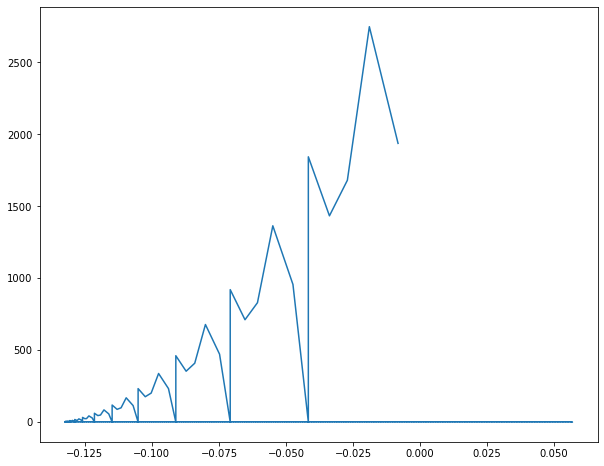

In [316]:
plt.figure(figsize=(10,8))
plt.plot(thetas0 , costs_hestory)

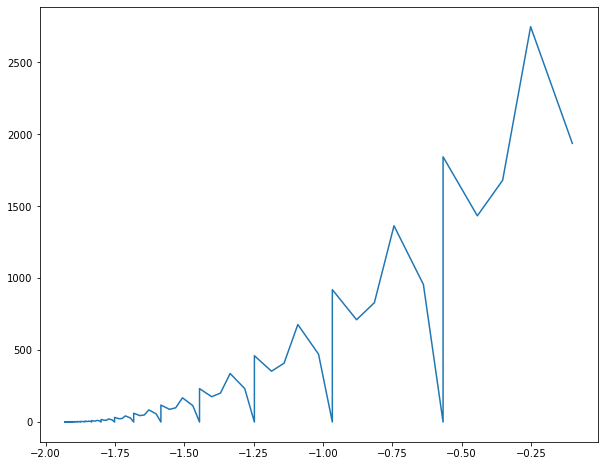

In [317]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory)

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

r2_score 0.9976302004574656


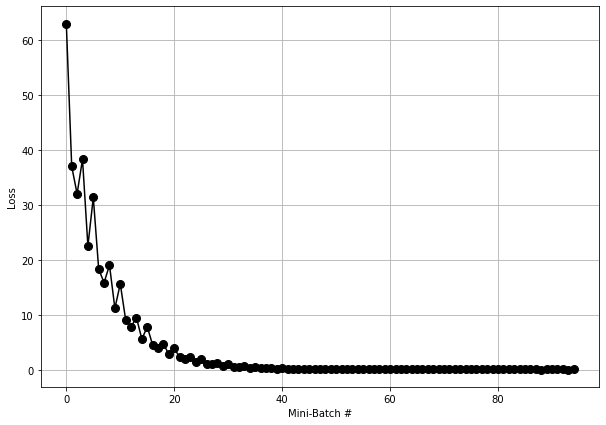

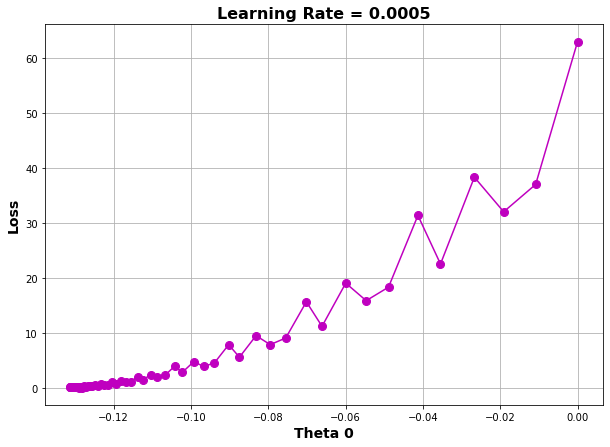

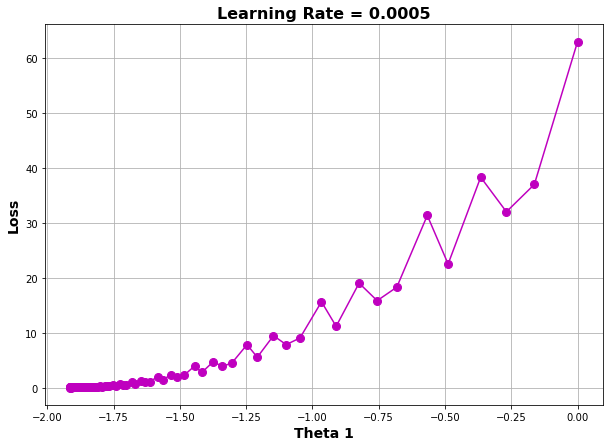

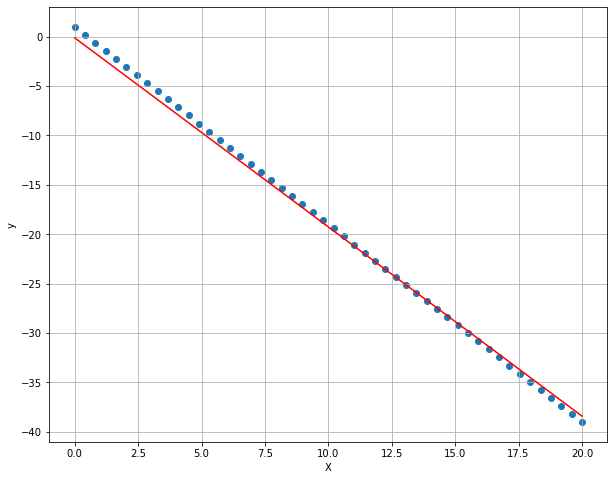

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

r2_score 0.9975575226128095


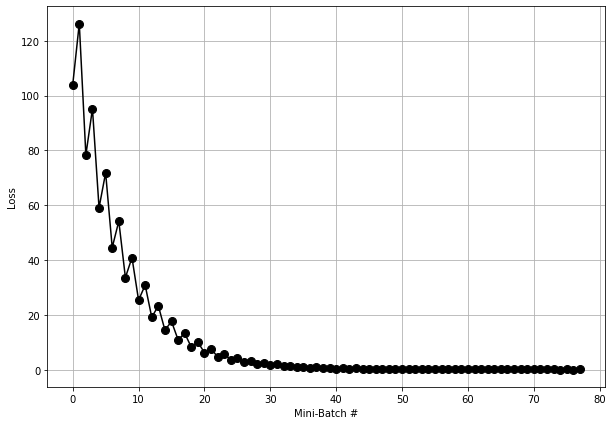

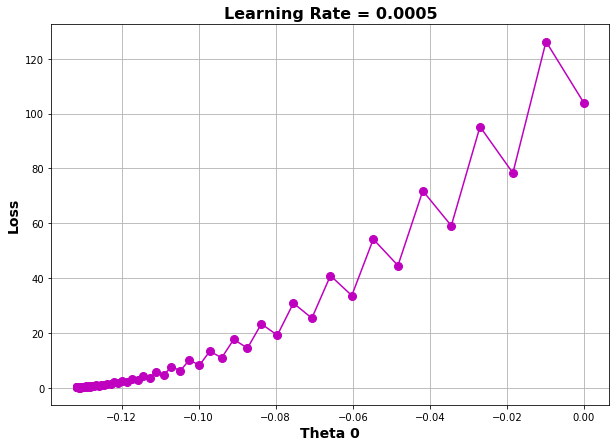

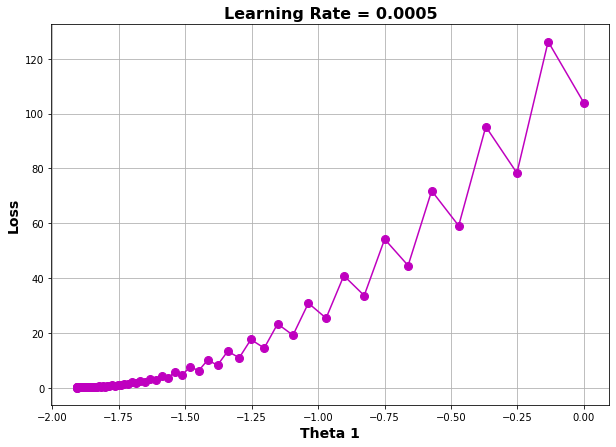

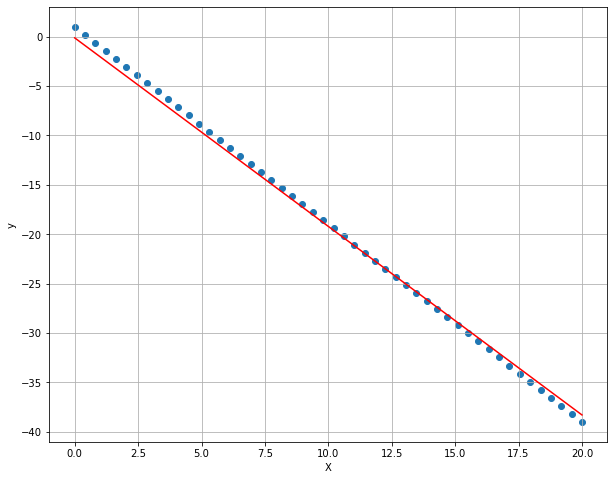

In [318]:
theta0, theta1 , costs_hestory , thetas0_per , thetas1_per , hs,thetas0,thetas1 = mini_batch(X,y,20 ,0.0005 , 300 )
h = predict(theta0 , theta1 ,X)

##################### Epoch 0 #######################################
theta 0 new is -0.022497499777137192
theta 1 new is -0.3066289062805247
gradient vector norm 365.0287108771963

cost per epoc is [[5000.13744273]]
-0.022497499777137192
-0.3066289062805247
##################### Epoch 1 #######################################
theta 0 new is -0.041334845826073906
theta 1 new is -0.5641732836557571
gradient vector norm 476.6784133558849

cost per epoc is [[0.]]
-0.041334845826073906
-0.5641732836557571
##################### Epoch 2 #######################################
theta 0 new is -0.057098018634024944
theta 1 new is -0.7804911768446757
gradient vector norm 541.756032524987

cost per epoc is [[3526.64416557]]
-0.057098018634024944
-0.7804911768446757
##################### Epoch 3 #######################################
theta 0 new is -0.0702791878259029
theta 1 new is -0.9621826195577413
gradient vector norm 583.3006552532023

cost per epoc is [[0.]]
-0.0702791878259029
-0.96218261

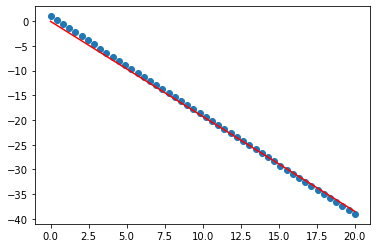

In [319]:
plt.scatter(X,y )
plt.plot(X,h , color = 'r')
plt.show()

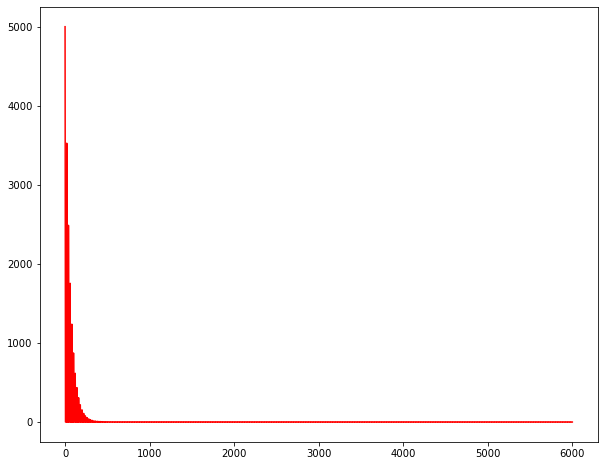

In [322]:
plt.figure(figsize=(10,8))
plt.plot(costs_hestory , color = 'r')


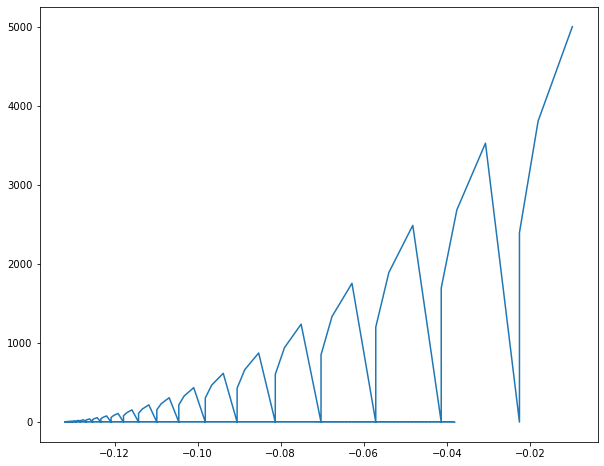

In [323]:
plt.figure(figsize=(10,8))
plt.plot(thetas0 , costs_hestory)

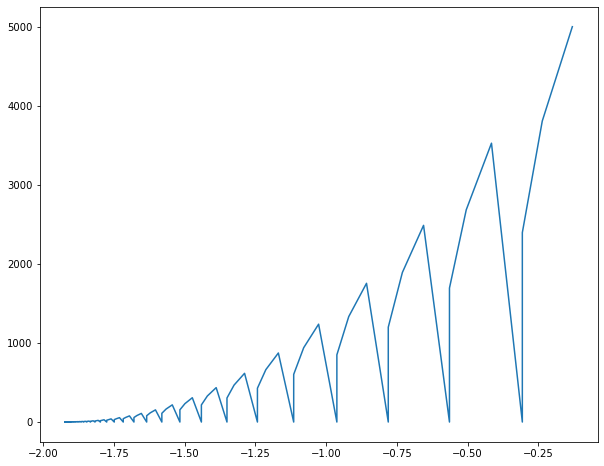

In [324]:
plt.figure(figsize=(10,8))
plt.plot(thetas1 , costs_hestory)